In [2]:
import numpy as np

### 데이터 준비

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 농어의 길이만 사용

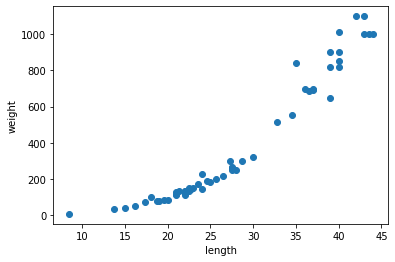

In [4]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련 세트 준비

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

- 사이킷런에 사용할 훈련세트는 2차원 배열이여야 함
- 넘파이 배열은 크기를 바꿀 수 있는 reshape() 매서드 제공
- (4,)배열을 (2,2) 크기로 바꿔봄

In [6]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [7]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 회귀 모델 훈련

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [10]:
knr.score(test_input, test_target)

0.992809406101064

In [11]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [12]:
knr.score(train_input, train_target)

0.9698823289099254

In [13]:
knr.score(test_input, test_target)

0.992809406101064

- 과대적합: 훈련세트에서 점수가 높고 테스트 세트에서 점수가 낮은 경우
- 과소적합: 훈련세트와 테스트세트의 점수가 모두 낮은 경우
- k-최근접 이웃회귀 평가 결과: 훈련세트보다 테스트세트의 점수가 높으므로 과소적합이다. 이를 해결하기 위해 모델을 복잡하게 만들어야 한다.

### 이웃 개수 줄이기

In [14]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

0.9804899950518966


In [15]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 03-2

In [16]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [18]:
print(knr.predict([[50]]))

[1033.33333333]


### k-최근점 이웃의 한계

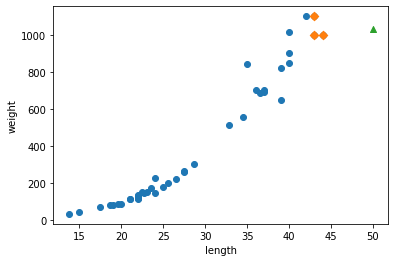

In [19]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [21]:
print(knr.predict([[100]]))

[1033.33333333]


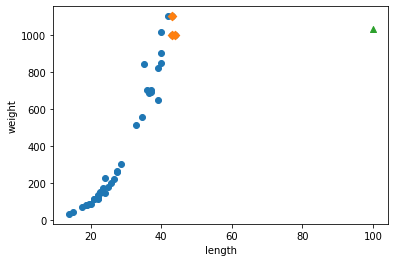

In [22]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형회귀

- 선형회귀: 특성이 하나인경우 어떤 직선을 학습하느 알고리즘
###### 어떤 직선이 농어 데이터를 가장 잘 표현하는가?
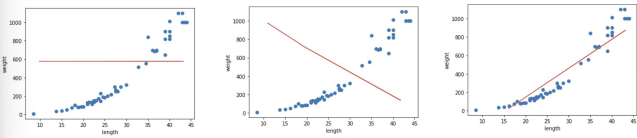

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [24]:
print(lr.predict([[100]]))

[3192.69585141]


In [25]:
x= 15
print(x*lr.coef_ + lr.intercept_)

[-123.7614705]


In [26]:
print(lr.predict([[45]]))

[1046.75287841]


In [27]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- coef_와 intercept_: 모델 파라미터
- 머신러닝 알고리즘의 훈련과정은 최적의 모델 파라미터를 찾는 것과 같으므로, 모델 기반 학습이라고 부름
- k-최근접 이웃은 모델 파라미터가 없으므로 사례 기반 학습이라고 부름
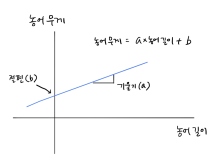

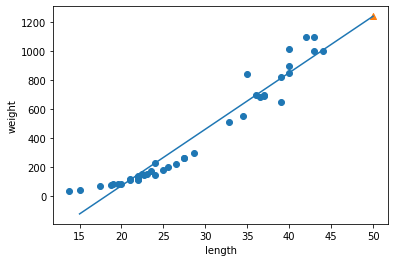

In [33]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
print(lr.score(train_input, train_target))

0.9398463339976041


In [30]:
print(lr.score(test_input, test_target))

0.8247503123313559


#### 훈련세트와 테스트세트의 R^2

In [31]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559


과대적합인가???  
과소적합인가???

### 다항회귀

- 농어의 길이와 무게에 대한 산점도는 일직선이라기 보다 왼쪽 위로 조금 구부러진 곡선에 가까움
- 최적의 직선을 찾기보다 최적의 곡선을 찾으면 어떨까?  
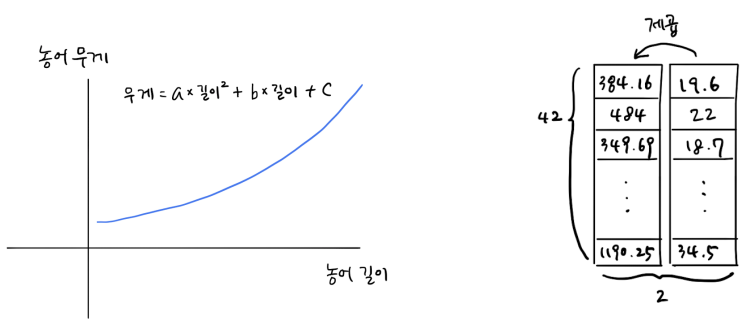

----

- 농어의 길이를 제곱하여 원래 데이터 앞에 붙임

In [34]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


#### 모델 재훈련

In [35]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [36]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [37]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


#### 학습한 직선그리기

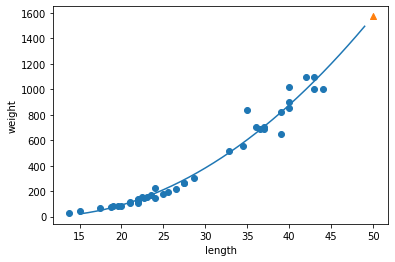

In [38]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [39]:
print(lr.score(train_poly, train_target))

0.9706807451768623


In [40]:
print(lr.score(test_poly, test_target))

0.9775935108325121


In [ ]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()